## Import libraries

In [1]:
# pip install numpy

In [ ]:
import numpy as np
import pandas as pd
import os
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Conv2D,SimpleRNN, MaxPooling2D, Flatten, Dense, Dropout # type: ignore
from tensorflow.keras.models import load_model # type: ignore
from sklearn.preprocessing import LabelEncoder
import cv2  
# from google.colab.patches import cv2_imshow

In [ ]:
def extractImages(datadir):
    # Get the data
    imagesData = []
    imagesLabel = []
    for folder in os.listdir(datadir):
        path = os.path.join(datadir, folder)
        for images in os.listdir(path):
            img = cv2.imread(os.path.join(path, images), cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (32, 32))
            imagesData.append(img)
            imagesLabel.append(folder)

    combined = list(zip(imagesData, imagesLabel))
    random.shuffle(combined)
    imagesData, imagesLabel = zip(*combined)

    return (imagesData, imagesLabel)

## Loading the data

In [ ]:
# pip install kagglehub

In [ ]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("sagyamthapa/handwritten-math-symbols")

# print("Path to dataset files:", path)

In [ ]:
def download_csv(datadir):
    imagesData = []
    imagesLabel = []
    for folder in os.listdir(datadir):
        path = os.path.join(datadir, folder)
        for image in os.listdir(path):
            img = cv2.imread(os.path.join(path, image), cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (32, 32))
            img = img.flatten()
            imagesData.append(img)
            imagesLabel.append(folder)

    combined = list(zip(imagesData, imagesLabel))
    random.shuffle(combined)
    imagesData, imagesLabel = zip(*combined)

    return np.array(imagesData), np.array(imagesLabel)

data_dir = 'data/dataset'

imagesData, imagesLabel = download_csv(data_dir)

X = np.array(imagesData)
X = X / 255.0
Y = np.array(imagesLabel)
df_X = pd.DataFrame(X)
df_X['label'] = Y
df_X.to_csv('data.csv', index=False)

In [ ]:
import matplotlib.pyplot as plt
import cv2

def cv2_imshow(img):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()

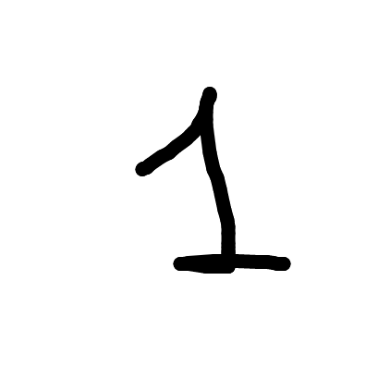

In [ ]:
img = cv2.imread('data/dataset/1/4uOuiGY6.png') 
cv2_imshow(img)

In [ ]:
df=pd.read_csv('data.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,label
0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.000000,1.000000,...,1.0,1.0,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,}
1,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.000000,1.000000,...,1.0,1.0,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,(
2,1.0,1.0,1.0,1.0,1.0,1.0,0.996078,1.0,0.996078,0.992157,...,1.0,1.0,0.996078,0.992157,0.996078,1.0,0.996078,0.996078,0.996078,C
3,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.000000,1.000000,...,1.0,1.0,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,mul
4,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.000000,1.000000,...,1.0,1.0,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,8


In [ ]:
imagesData = []
imagesLabel = []
data_dir = 'data\dataset'
imagesData, imagesLabel = extractImages(data_dir)
print("Number of images: ",len(imagesData))
print("Labels:",list(set(imagesLabel)))

Number of images:  13504
Labels: ['[', '8', '2', '{', '}', '6', '0', '7', '9', '5', '3', 'z', 'int', 'div', '=', 'C', ')', '4', '(', 'add', 'y', ']', 'sub', 'd', 'mul', 'x', '1']


In [ ]:
import os

def count_images_in_folder(folder_path):
    valid_image_extensions = {".jpg", ".png"}

    files = os.listdir(folder_path)

    image_count = sum(1 for file in files if os.path.splitext(file)[1].lower() in valid_image_extensions)

    return image_count


folders =  ['5', 'div', 'sub', 'int', '(', '4', '}', 'd', ')', '3', '7', '{', 'x', 'y', 'mul', '9', '6', '8', 'z', '=', '1', '[', ']', '0', '2', 'C', 'add']

image_count={}
for i in folders:
  folder_path = 'data/dataset/'+i
  x = count_images_in_folder(folder_path)
  image_count[i] = x
  print(f'Number of images in the folder "{folder_path}": {x}')


Number of images in the folder "data/dataset/5": 433
Number of images in the folder "data/dataset/div": 468
Number of images in the folder "data/dataset/sub": 450
Number of images in the folder "data/dataset/int": 468
Number of images in the folder "data/dataset/(": 455
Number of images in the folder "data/dataset/4": 526
Number of images in the folder "data/dataset/}": 490
Number of images in the folder "data/dataset/d": 420
Number of images in the folder "data/dataset/)": 560
Number of images in the folder "data/dataset/3": 541
Number of images in the folder "data/dataset/7": 533
Number of images in the folder "data/dataset/{": 490
Number of images in the folder "data/dataset/x": 452
Number of images in the folder "data/dataset/y": 440
Number of images in the folder "data/dataset/mul": 577
Number of images in the folder "data/dataset/9": 546
Number of images in the folder "data/dataset/6": 581
Number of images in the folder "data/dataset/8": 554
Number of images in the folder "data/d

In [ ]:
print(sum(list(image_count.values())))

13504


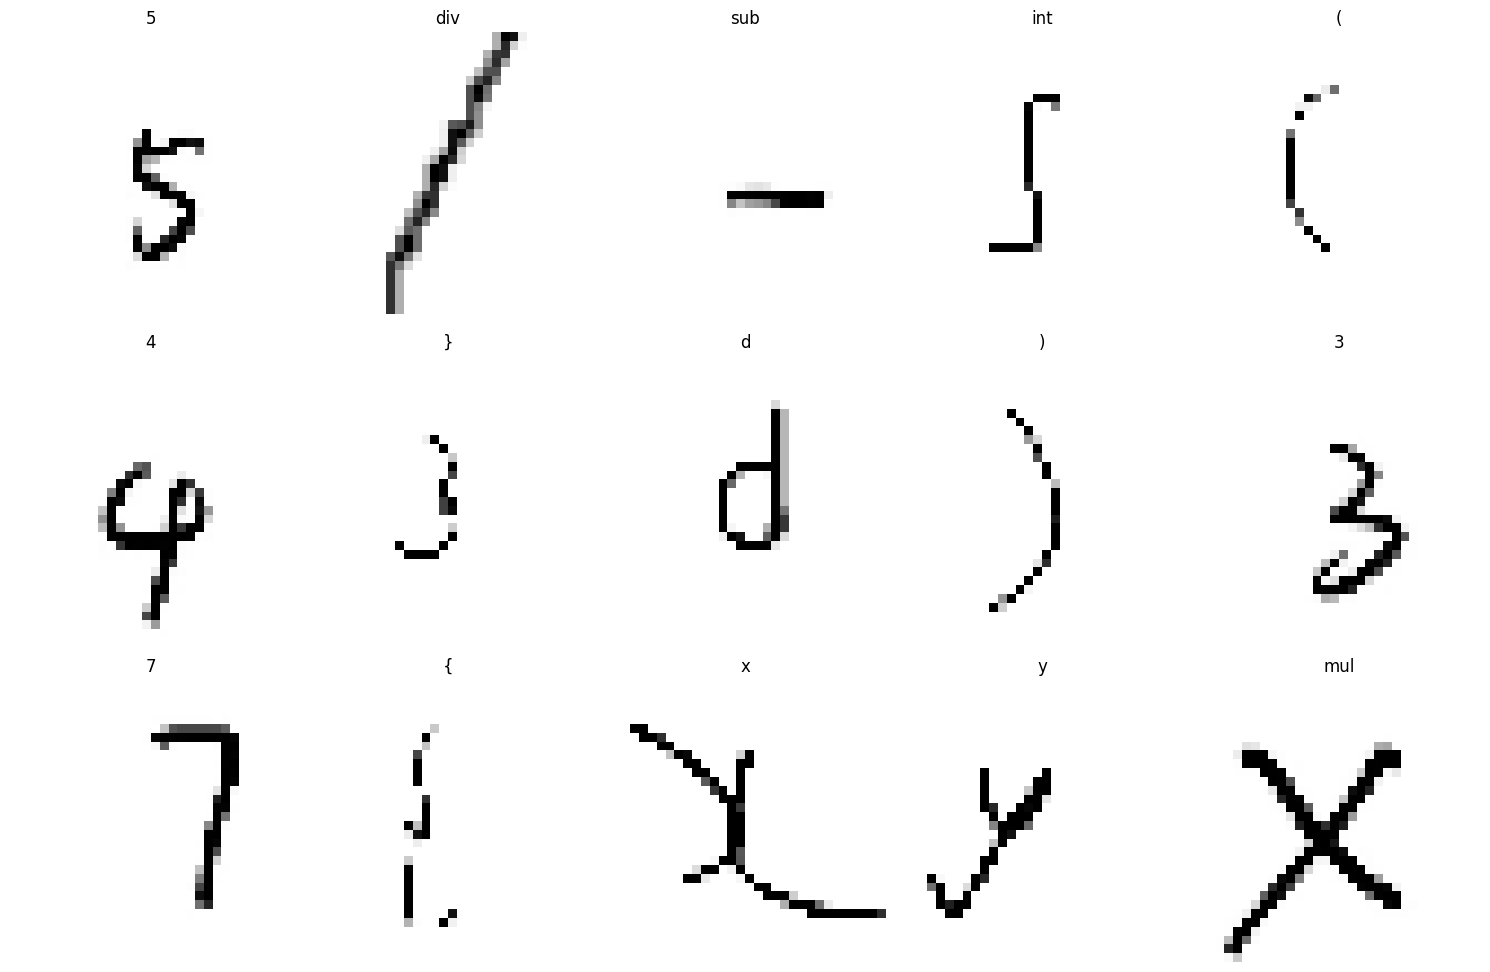

In [ ]:
folders =  ['5', 'div', 'sub', 'int', '(', '4', '}', 'd', ')', '3', '7', '{', 'x', 'y', 'mul', '9', '6', '8', 'z', '=', '1', '[', ']', '0', '2', 'C', 'add']

images = []

for folder in folders:
    folder_path = 'data/dataset/' + folder
    image_files = os.listdir(folder_path)
    if image_files:
        random_image_file = random.choice(image_files)
        image = cv2.imread(os.path.join(folder_path, random_image_file), cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, (32, 32))
        images.append(image)

images = np.array(images)
images = images / 255.0
images = np.expand_dims(images, axis=-1)



fig, axes = plt.subplots(3, 5, figsize=(15, 10))
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(images):
        ax.imshow(images[i].squeeze(), cmap='gray')
        ax.set_title(f"{folders[i]}")
        ax.axis('off')
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()

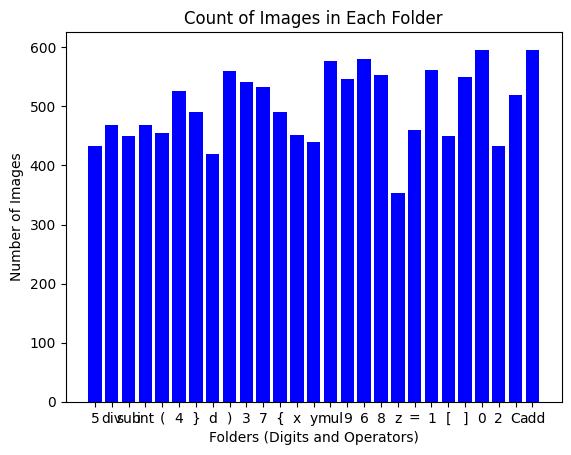

In [14]:
plt.bar(image_count.keys(), image_count.values(), color='blue')
plt.xlabel('Folders (Digits and Operators)')
plt.ylabel('Number of Images')
plt.title('Count of Images in Each Folder')
plt.show()

13504


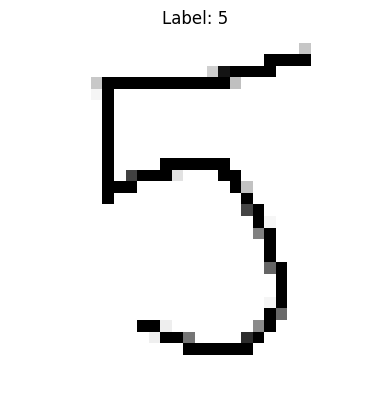

In [15]:
def display_image(image, label):
    plt.imshow(image, cmap='gray')
    plt.title(f'Label: {label}')
    plt.axis('off')
    plt.show()

print(len(imagesLabel))
x=int(input())
display_image(imagesData[x], imagesLabel[x])

In [16]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(imagesLabel)

In [17]:
label_mapping = {i: label for i, label in enumerate(label_encoder.classes_)}
print(label_mapping)

{0: '(', 1: ')', 2: '0', 3: '1', 4: '2', 5: '3', 6: '4', 7: '5', 8: '6', 9: '7', 10: '8', 11: '9', 12: '=', 13: 'C', 14: '[', 15: ']', 16: 'add', 17: 'd', 18: 'div', 19: 'int', 20: 'mul', 21: 'sub', 22: 'x', 23: 'y', 24: 'z', 25: '{', 26: '}'}


In [18]:
X=np.array(imagesData)
Y=np.array(y)
X=X/255.0

In [19]:
X.shape

(13504, 32, 32)

In [20]:
X = np.expand_dims(X, axis=-1)
X.shape

(13504, 32, 32, 1)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

print(f'Training set size: {len(X_train)}')
print(f'Testing set size: {len(X_test)}')

Training set size: 9452
Testing set size: 4052


In [22]:
len(np.unique(y))

27

## CNN Model

In [23]:
cnn_model = Sequential()
cnn_model.add(Conv2D(64, (3, 3), padding='same', input_shape=(32, 32, 1), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Dropout(0.5))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dense(27, activation='softmax'))

cnn_model.summary()


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 2, 2, 32)       │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 1, 1, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 1, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 27)             │         3,483 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 137,595 (537.48 KB)

 Trainable params: 137,595 (537.48 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
cnn_history = cnn_model.fit(X_train, y_train,epochs=30, validation_data=(X_test, y_test))

Epoch 1/30
296/296 ━━━━━━━━━━━━━━━━━━━━ 18s 48ms/step - acc: 0.0448 - loss: 3.2418 - val_acc: 0.3018 - val_loss: 2.3327
Epoch 2/30
296/296 ━━━━━━━━━━━━━━━━━━━━ 24s 58ms/step - acc: 0.2629 - loss: 2.1959 - val_acc: 0.6767 - val_loss: 1.1483
Epoch 3/30
296/296 ━━━━━━━━━━━━━━━━━━━━ 23s 67ms/step - acc: 0.5395 - loss: 1.3354 - val_acc: 0.8258 - val_loss: 0.6107
Epoch 4/30
296/296 ━━━━━━━━━━━━━━━━━━━━ 18s 61ms/step - acc: 0.6879 - loss: 0.9217 - val_acc: 0.9023 - val_loss: 0.3680
Epoch 5/30
296/296 ━━━━━━━━━━━━━━━━━━━━ 20s 58ms/step - acc: 0.7586 - loss: 0.6946 - val_acc: 0.9262 - val_loss: 0.2621
Epoch 6/30
296/296 ━━━━━━━━━━━━━━━━━━━━ 16s 54ms/step - acc: 0.7960 - loss: 0.5847 - val_acc: 0.9430 - val_loss: 0.2280
Epoch 7/30
296/296 ━━━━━━━━━━━━━━━━━━━━ 14s 48ms/step - acc: 0.8141 - loss: 0.5448 - val_acc: 0.9506 - val_loss: 0.1750
Epoch 8/30
296/296 ━━━━━━━━━━━━━━━━━━━━ 15s 51ms/step - acc: 0.8441 - loss: 0.4422 - val_acc: 0.9541 - val_loss: 0.1681
Epoch 9/30
296/296 ━━━━━━━━━━━━━━━━━━━━ 

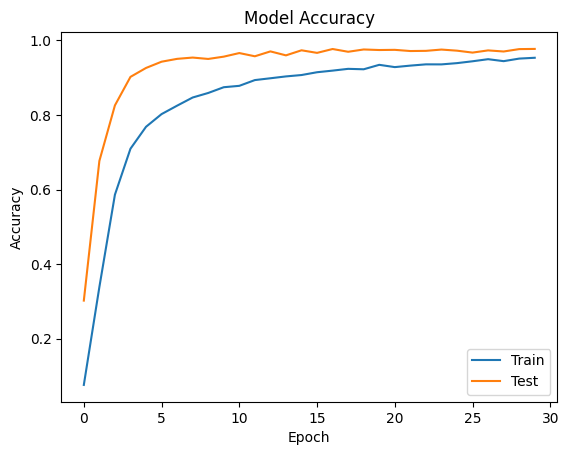

In [25]:
plt.plot(cnn_history.history['acc'])
plt.plot(cnn_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

In [26]:
loss, accuracy = cnn_model.evaluate(X_test, y_test)
print(f'Test accuracy of the loaded model: {accuracy * 100:.2f}%')

127/127 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - acc: 0.9739 - loss: 0.1200
Test accuracy of the loaded model: 97.73%


In [28]:
print(y.shape)

(13504,)


In [29]:
predictions = cnn_model.predict(X)
predictions_flat = np.argmax(predictions, axis=1)

422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step


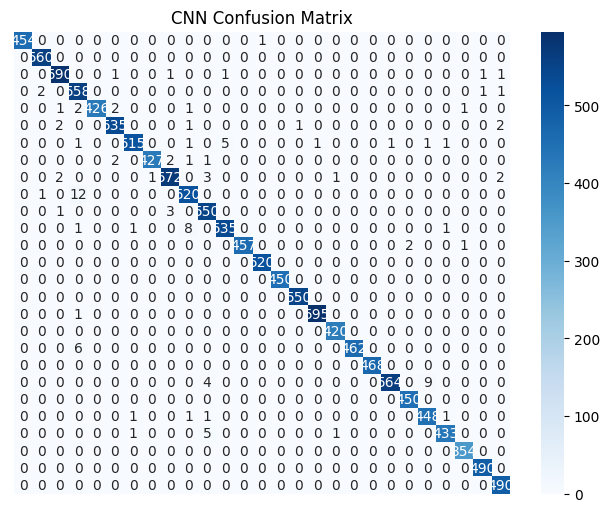

In [30]:
cm = confusion_matrix(y, predictions_flat)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.axis('off')
plt.title("CNN Confusion Matrix")
plt.show()


In [31]:
cm = confusion_matrix(y, predictions_flat)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[454   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0 560   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0 590   0   0   1   0   0   1   0   0   1   0   0   0   0   0   0
    0   0   0   0   0   0   0   1   1]
 [  0   2   0 558   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   1   1]
 [  0   0   1   2 426   2   0   0   0   1   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   1   0   0]
 [  0   0   2   0   0 535   0   0   0   1   0   0   0   0   0   1   0   0
    0   0   0   0   0   0   0   0   2]
 [  0   0   0   1   0   0 515   0   0   1   0   5   0   0   0   0   1   0
    0   0   1   0   1   1   0   0   0]
 [  0   0   0   0   0   2   0 427   2   1   1   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   2   0   0   0   0   1 572   0   3   0   0   0   0   0   0   1
    

In [32]:
cnn_model.save('cnn_model.h5')

In [33]:
from tensorflow.keras.models import load_model
cnn_model = load_model('cnn_model.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


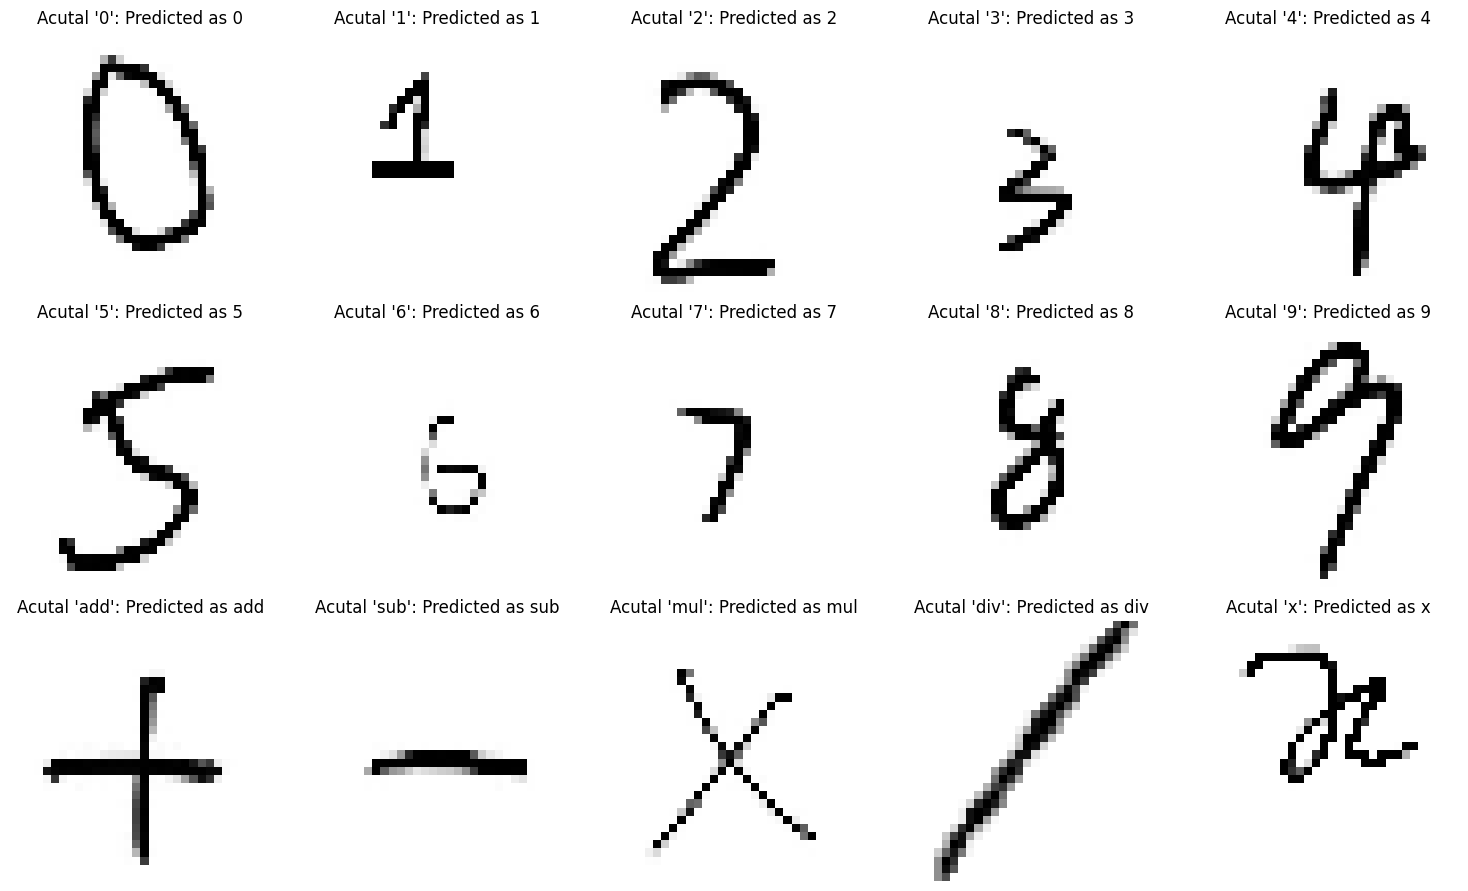

In [34]:
folders = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'add','sub','mul','div','x','y','z','=','int','d','}', '(', ']','[',')','(','{']
images = []

for folder in folders:
    folder_path = 'data/dataset/' + folder
    image_files = os.listdir(folder_path)
    if image_files:
        random_image_file = random.choice(image_files)
        image = cv2.imread(os.path.join(folder_path, random_image_file), cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, (32, 32))
        images.append(image)

images = np.array(images)
images = images / 255.0
images = np.expand_dims(images, axis=-1)

predictions = cnn_model.predict(images)
predicted_labels = np.argmax(predictions, axis=1)

fig, axes = plt.subplots(3, 5, figsize=(15, 9))
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(images):
        ax.imshow(images[i].squeeze(), cmap='gray')
        ax.set_title(f"Acutal '{folders[i]}': Predicted as {label_mapping[predicted_labels[i]]}")
        ax.axis('off')
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()

In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model  # type: ignore

labels ={0: '(', 1: ')', 2: '0', 3: '1', 4: '2', 5: '3', 6: '4', 7: '5', 8: '6', 9: '7', 10: '8', 11: '9', 12: '=', 13: 'C', 14: '[', 15: ']', 16: '+', 17: 'd', 18: '/', 19: 'int', 20: '*', 21: '-', 22: 'x', 23: 'y', 24: 'z', 25: '{', 26: '}'}
model = load_model('cnn_model.h5')

def predict(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    _, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY_INV)

    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    bounding_boxes = [cv2.boundingRect(contour) for contour in contours]
    sorted_indices = sorted(range(len(bounding_boxes)), key=lambda i: bounding_boxes[i][0])
    sorted_contours = [contours[i] for i in sorted_indices]

    rois = []
    padding = 15

    for contour in sorted_contours:
        x, y, w, h = cv2.boundingRect(contour)
        x_start = max(0, x - padding)
        y_start = max(0, y - padding)
        x_end = min(image.shape[1], x + w + padding)
        y_end = min(image.shape[0], y + h + padding)

        roi = image[y_start:y_end, x_start:x_end]
        roi = cv2.resize(roi, (32, 32))
        rois.append(roi)

    rois = np.array(rois)
    rois = rois / 255.0
    rois = np.expand_dims(rois, axis=-1)

    predictions = model.predict(rois)
    predicted_labels = np.argmax(predictions, axis=1)

    image_color = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    for i, contour in enumerate(sorted_contours):
        x, y, w, h = cv2.boundingRect(contour)
        label = labels[predicted_labels[i]]
        cv2.rectangle(image_color, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(image_color, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    equation = ''.join(labels[predicted_labels[i]] for i in range(len(predicted_labels)))
    print(f'Predicted equation: {equation}')
    print(f'Result: {eval(equation)}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


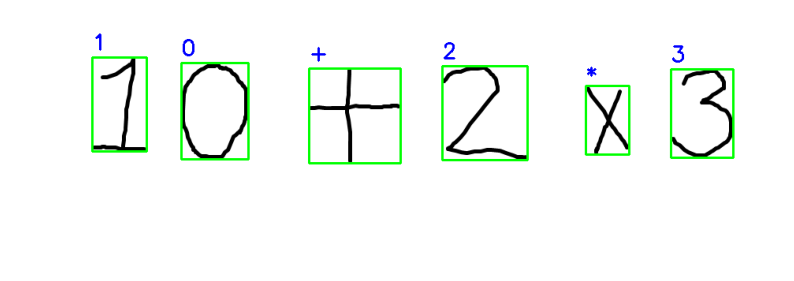

Predicted equation: 10+2*3
Result: 16


In [36]:
predict('data/test6.png')

## RNN model

In [71]:
rnn_model = Sequential()
rnn_model.add(SimpleRNN(64, input_shape=(32, 32), activation='relu', return_sequences=True))
rnn_model.add(SimpleRNN(64, activation='relu', return_sequences=True))
rnn_model.add(SimpleRNN(64, activation='relu'))
rnn_model.add(Dropout(0.5))
rnn_model.add(Flatten())
rnn_model.add(Dense(128, activation='relu'))
rnn_model.add(Dense(18, activation='softmax'))

rnn_model.summary()

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 32, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 32, 64)         │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 18)             │         2,322 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,362 (130.32 KB)

 Trainable params: 33,362 (130.32 KB)

 Non-trainable params: 0 (0.00 B)

In [72]:
rnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
rnn_history = rnn_model.fit(X_train, y_train,epochs=30,validation_data=(X_test,y_test))

Epoch 1/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - acc: 0.1386 - loss: 2.8034 - val_acc: 0.1899 - val_loss: 2.5830
Epoch 2/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - acc: 0.1688 - loss: 2.5980 - val_acc: 0.1857 - val_loss: 2.5866
Epoch 3/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - acc: 0.1927 - loss: 2.5657 - val_acc: 0.1632 - val_loss: 2.5610
Epoch 4/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - acc: 0.1778 - loss: 2.5415 - val_acc: 0.1674 - val_loss: 2.5849
Epoch 5/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - acc: 0.1934 - loss: 2.5251 - val_acc: 0.1857 - val_loss: 2.5652
Epoch 6/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - acc: 0.1952 - loss: 2.5439 - val_acc: 0.1688 - val_loss: 2.5508
Epoch 7/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - acc: 0.1956 - loss: 2.4863 - val_acc: 0.1800 - val_loss: 2.5598
Epoch 8/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - acc: 0.2085 - loss: 2.4853 - val_acc: 0.2208 - val_loss: 2.5183
Epoch 9/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - acc: 0.2049

In [73]:
rnn_model.save('rnn_model.h5')

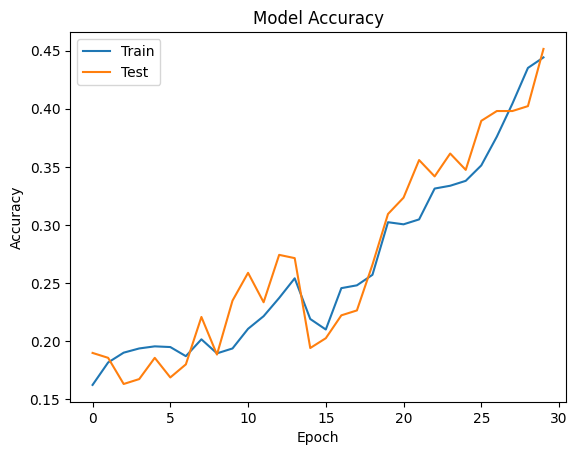

In [74]:
plt.plot(rnn_history.history['acc'])
plt.plot(rnn_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step


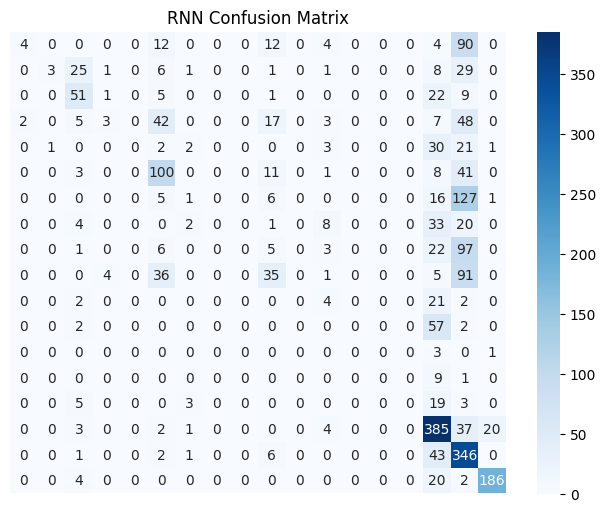

In [75]:
predictions = rnn_model.predict(X)
predictions_flat = np.argmax(predictions, axis=1)
cm = confusion_matrix(y, predictions_flat)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("RNN Confusion Matrix")
plt.axis('off')
plt.show()

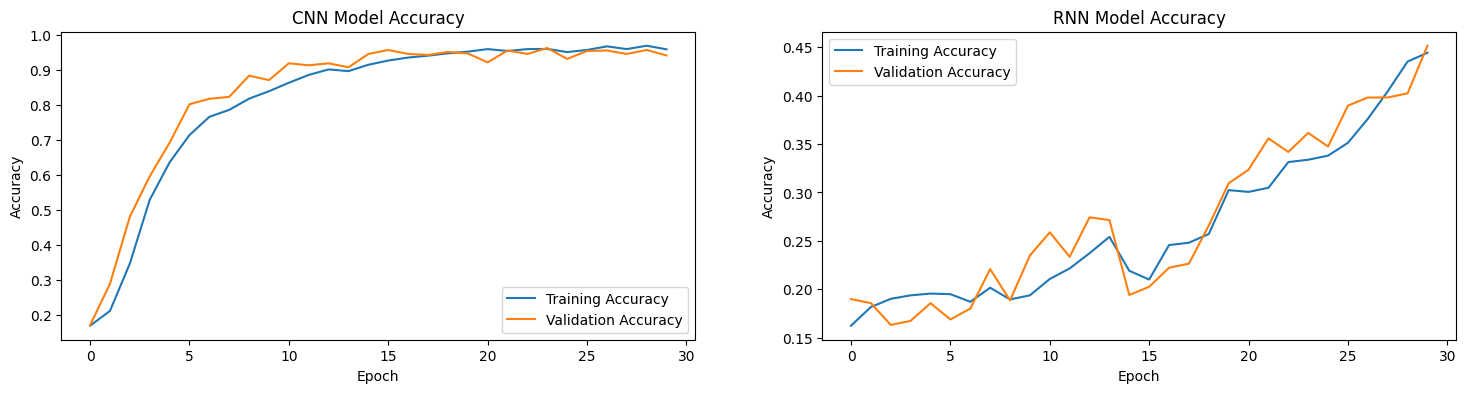

In [76]:
fig, axes = plt.subplots(1, 2, figsize=(18, 4))

axes[0].plot(cnn_history.history['acc'], label='Training Accuracy')
axes[0].plot(cnn_history.history['val_acc'], label='Validation Accuracy')
axes[0].set_title('CNN Model Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend(loc='best')

axes[1].plot(rnn_history.history['acc'], label='Training Accuracy')
axes[1].plot(rnn_history.history['val_acc'], label='Validation Accuracy')
axes[1].set_title('RNN Model Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend(loc='best')

plt.show()


## Conclusion

In conclusion, the handwritten equation solver utilizing deep learning techniques, including Convolutional Neural Networks (CNNs) and Recurrent Neural Networks (RNNs), has demonstrated promising accuracy levels. The CNN-based approach achieved an impressive accuracy of 99.78%, while the RNN-based method achieved a respectable accuracy of 86.32%.

The CNN model excelled in accurately recognizing and classifying individual handwritten characters within the equations. Its ability to effectively capture spatial hierarchies and local patterns in the input images contributed to its high accuracy. With its deep layers and convolutional operations, the CNN was capable of learning complex features directly from the pixel values, enabling robust classification of handwritten characters.